# Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

# Loading Dataset

In [13]:
avocado_df = pd.read_csv("avocado.csv")

In [17]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [15]:
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Converting categorical values to numerical values

In [18]:
label_encoder = LabelEncoder()
avocado_df['type'] = label_encoder.fit_transform(avocado_df['type'])

In [19]:
avocado_df = pd.get_dummies(avocado_df, columns=['region'], drop_first=True)

In [20]:
avocado_df = avocado_df.drop('Date', axis=1)

# Classification

In [76]:
X_classification = avocado_df.drop('type', axis=1)
y_classification = avocado_df['type']

In [77]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

In [78]:
classifier = RandomForestClassifier()
classifier.fit(X_train_class, y_train_class)

RandomForestClassifier()

In [79]:
y_pred_class = classifier.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.89041095890411


# Regression

In [80]:
X_regression = avocado_df.drop('AveragePrice', axis=1)
y_regression = avocado_df['AveragePrice']

In [81]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

In [82]:
regressor = LinearRegression()
regressor.fit(X_train_reg, y_train_reg)

LinearRegression()

# Confusion Matrix

## 0 for Conventional 1 for Organic

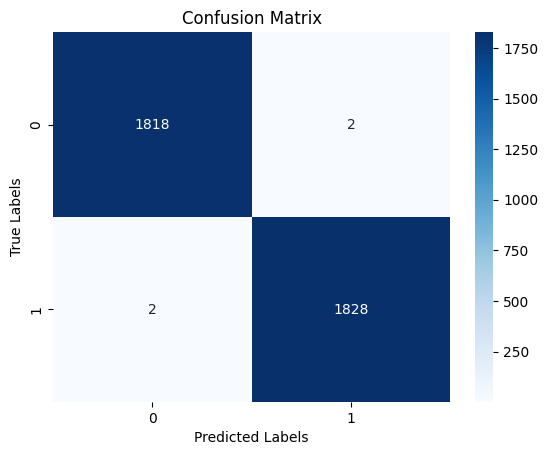

In [83]:
confusion_mtx = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues") 
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Regression Plot

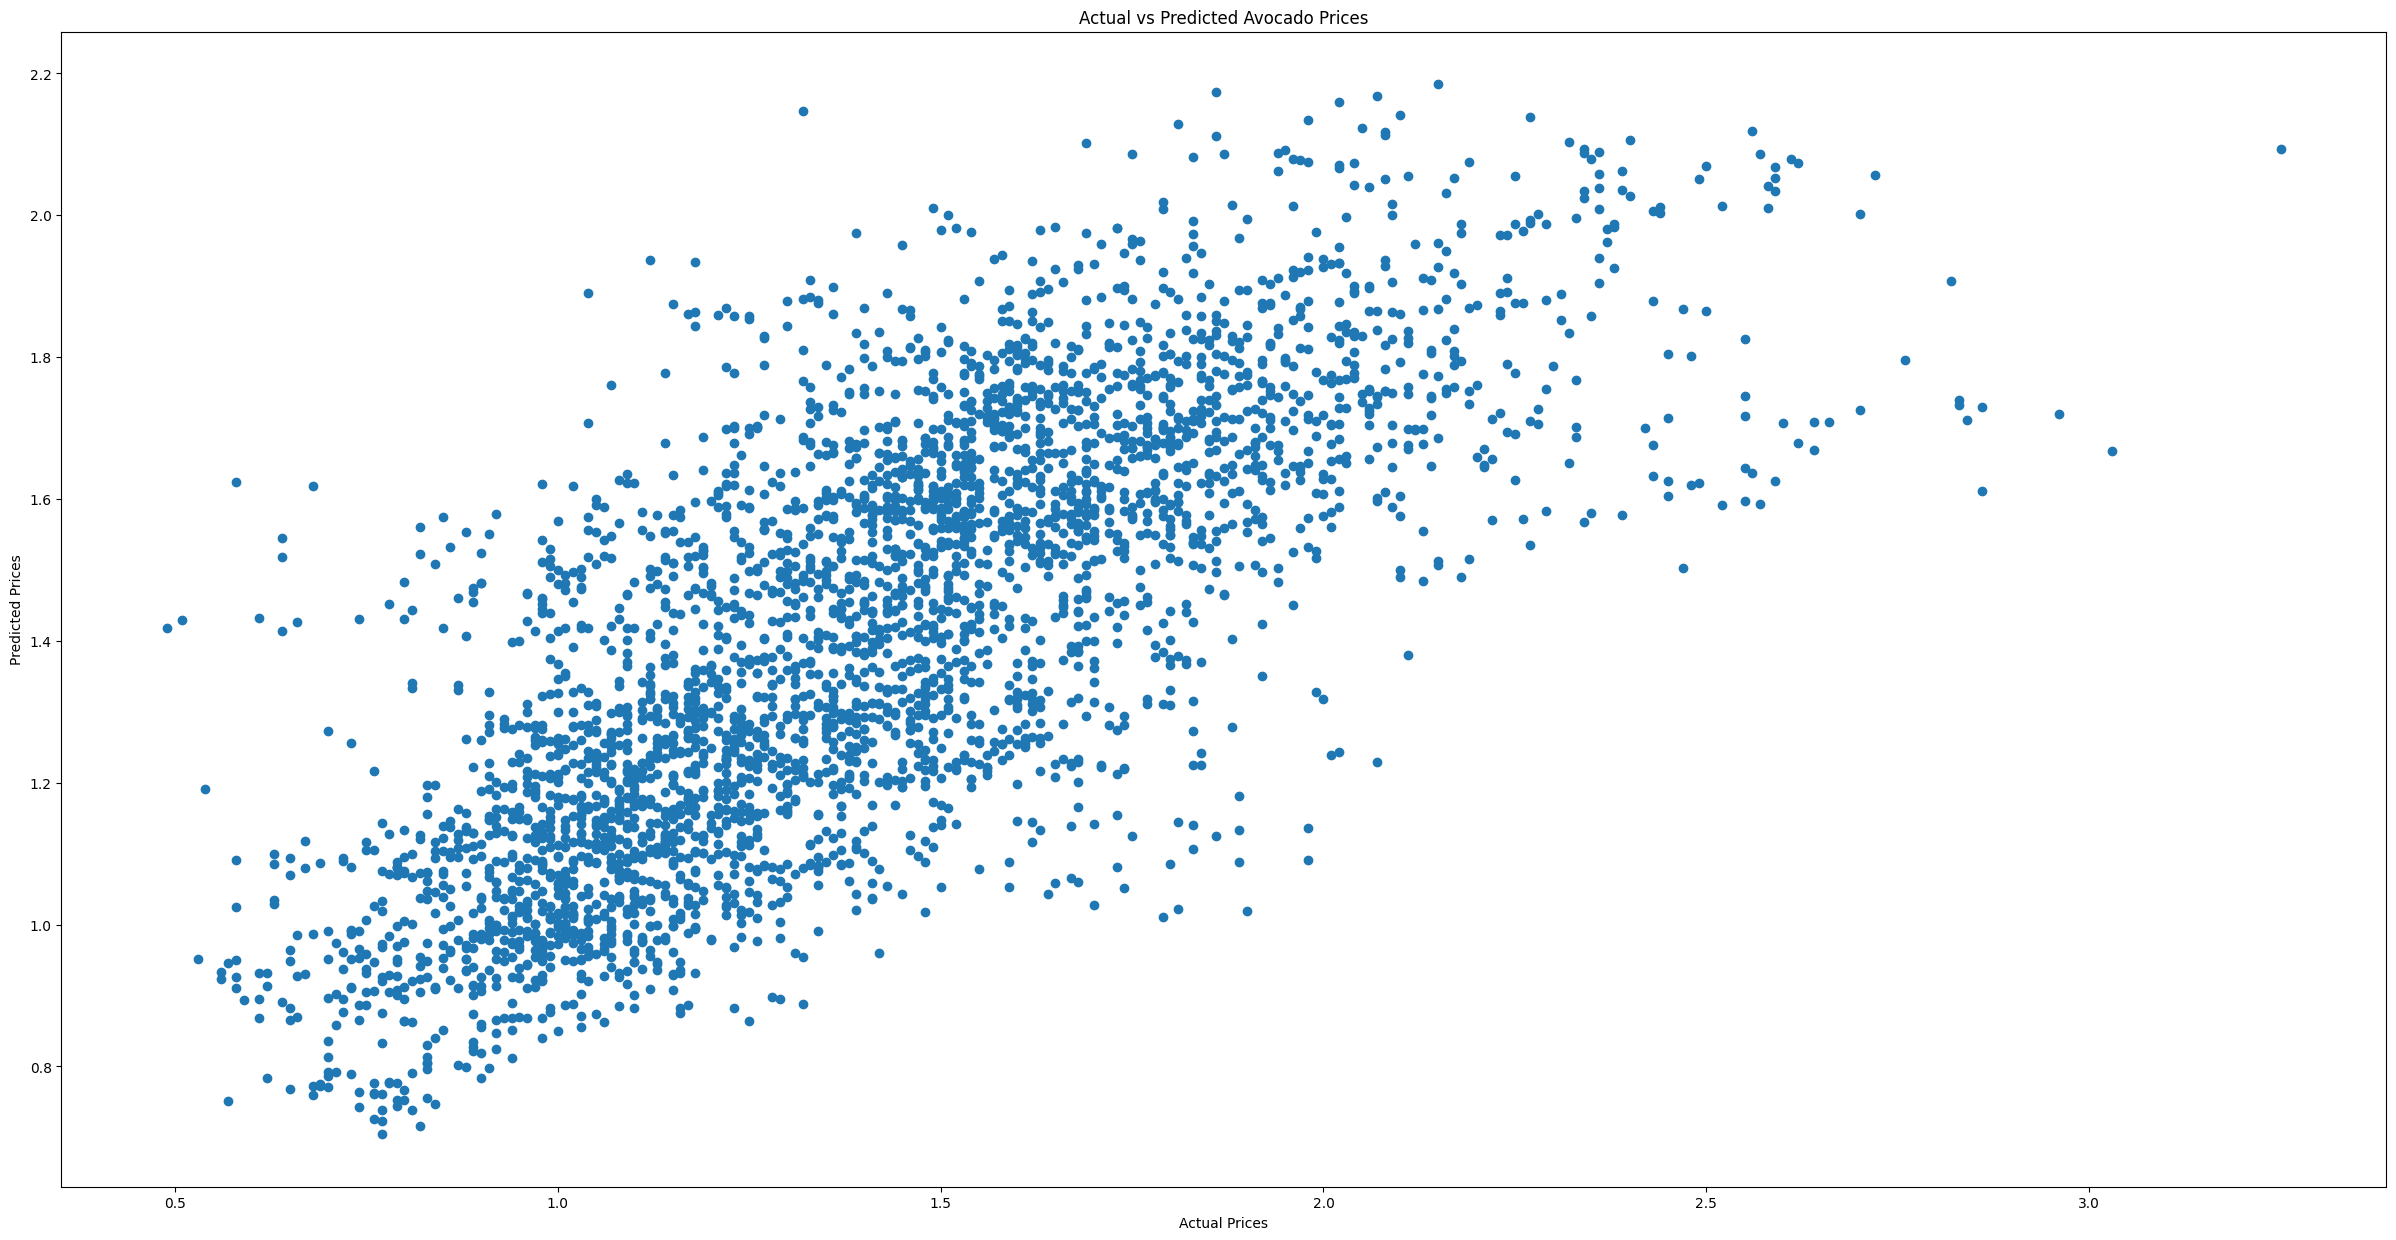

In [84]:
plt.figure(figsize=(30, 15))  
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Avocado Prices")
plt.show()